# Dataset source:  http://roycekimmons.com/tools/generated_data/exams

## This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.



##### Libraries used:
    Numpy
    Pandas
    Matplotlib.pyplot
    Seaborn

In [1]:
#importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv(r"C:\Users\ASUS\Desktop\Visualize Libs\Matplotlib\Project2\StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
#creating a new column which contains students' average score
df['average score'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df = df.round(2)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [5]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [6]:
#check if there is any null in the dataset
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
average score                  False
dtype: bool

### There is no null in this dataset

In [7]:
#Descriptive statistics:
df.describe(include = 'all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,67.770580
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,14.257311
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,9.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,58.330000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,68.330000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,77.670000


# Visualizing:

Text(0.5, 1.0, 'Female vs Male')

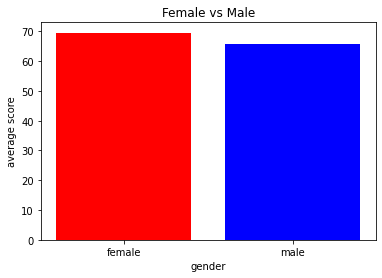

In [8]:
gender_score = df.groupby('gender')['average score'].mean().reset_index()
plt.bar(gender_score['gender'],gender_score['average score'], color = ['red', 'blue'] )
plt.xlabel('gender')
plt.ylabel('average score')
plt.title('Female vs Male')

### In general, Females seem to have a slightly higher average score than males. Let's get deeper!

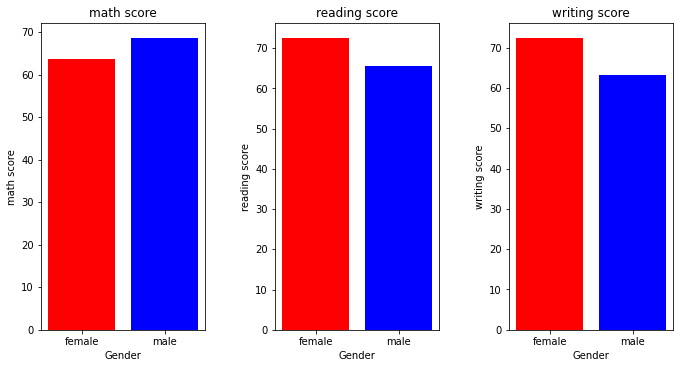

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

objects = df.columns[5:-1].tolist()
axes = (ax1, ax2, ax3)

for obj, axis in zip(objects, axes):
    axis.bar(df.groupby(by = 'gender')[obj].mean().reset_index()['gender'],
             df.groupby(by = 'gender')[obj].mean().reset_index()[obj], color = ['red', 'blue'])
    
for obj, axis in zip(objects, axes):
    axis.set_xlabel('Gender')
    axis.set_ylabel(obj)
    axis.title.set_text(obj)
    

### These 3 diagrams deeply explain why there is a gap between female and male average score. 
### While Male have a higher average score in math, they perform worse on reading and writing.

### Does lunch affect students' average score?

<BarContainer object of 2 artists>

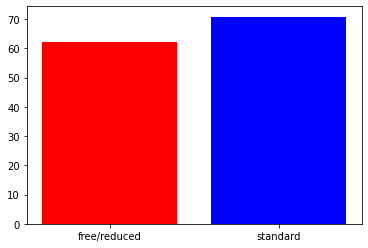

In [10]:
lunch = df.groupby(by = 'lunch')['average score'].mean().reset_index()

plt.bar(lunch['lunch'], lunch['average score'], color = ['red', 'blue'])

### Students who had have standard lunch perform better than those who had free/reduced lunch. Nutrients matters!!!!

### Does Parental Level of Education Matters?

<BarContainer object of 6 artists>

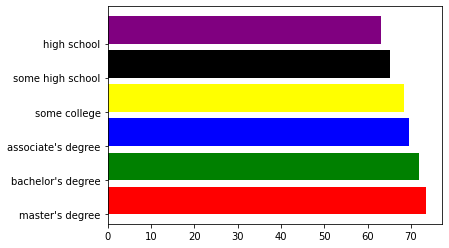

In [11]:
parent_edu = df.groupby(by = 'parental level of education')['average score'].mean().reset_index().sort_values(by = 'average score',ascending = False)

plt.barh(parent_edu['parental level of education'], 
        parent_edu['average score'], 
        color =['red', 'green','blue', 'yellow', 'black','purple'], align = 'edge'
        )





###  From what we can see from the datasets, the higher the parents' level of education is, the higher their child's average score.

### How preparation courses affect students average score?

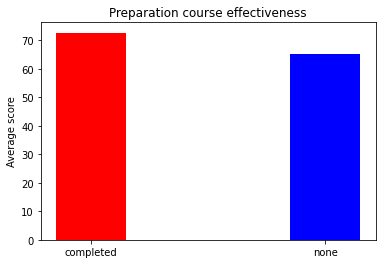

In [12]:
prep = df.groupby('test preparation course')['average score'].mean().reset_index().sort_values(by = 'average score', ascending = False)

plt.bar(prep['test preparation course'], prep['average score'], color =['red', 'blue'], width = 0.3, align ='center')

plt.ylabel('Average score')
plt.title('Preparation course effectiveness');

   ### Students who completed a preparation course tend to perform better than those who didn't 

<AxesSubplot:>

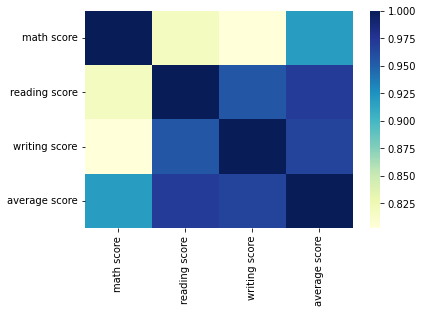

In [13]:
sns.heatmap(df.corr(),cmap="YlGnBu")

### In order to improve a specific subject, students have to improve on its related skill.
   1. For reading it's writing and vice versa.
   2.  For math? I'm sorry you have to grind :(

### Implications to improve students score:

#### Through what we've found from the dataset, there a three things that affect students' scores:

##### -Lunch before the test
##### -Parental Level of Education (hard to change)
##### -Preparation course

### The best way to improve children's test score is to make sure they have their best lunch before the test and a suitable preparation course!

